Shape: (28242, 8)
   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  

MODEL PERFORMANCE METRICS
R² Score: 0.986
MAE: 3720.379
RMSE: 10134.655


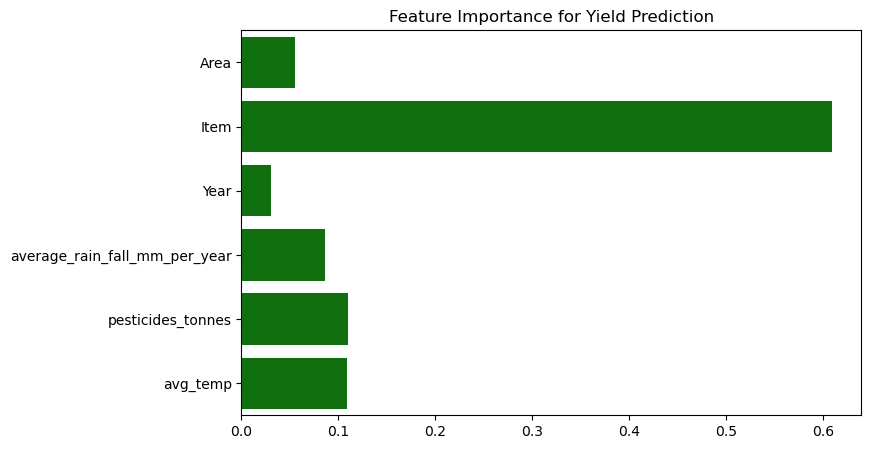


Country/Area: India
Year: 2020 | Rainfall: 1200 mm | Temp: 27C | Pesticides: 35 tonnes

Recommended Crops with Highest Predicted Yield:
1. Cassava: 182779.01 hg/ha yield
2. Potatoes: 125291.35 hg/ha yield
3. Yams: 113250.52 hg/ha yield


In [1]:
# This system predicts yield for all crops in a region
# and recommends the top crops with the highest predicted yield.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("RS-A1_yield.csv")
print("Shape:", df.shape)
print(df.head())

# Step 3: Data Preprocessing
# Fill missing numeric values
df = df.fillna(df.mean(numeric_only=True))

# Encode categorical columns
le_area = LabelEncoder()
le_item = LabelEncoder()
df['Area'] = le_area.fit_transform(df['Area'])
df['Item'] = le_item.fit_transform(df['Item'])

# Step 4: Define Features and Target
X = df[['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['hg/ha_yield']

# Step 5: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Model
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
print("\nMODEL PERFORMANCE METRICS")
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

# Step 8: Feature Importance Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns, color='green')
plt.title("Feature Importance for Yield Prediction")
plt.show()

# Step 9: Yield-Based Crop Recommendation Function
def recommend_best_crops(area, year, rainfall, pesticides, temperature, top_n=3):
    """
    Predicts yield for all crops under given conditions and recommends the best ones.
    """
    crops = df['Item'].unique()
    area_encoded = le_area.transform([area])[0]
    results = []

    for crop in crops:
        temp_df = pd.DataFrame({
            'Area': [area_encoded],
            'Item': [crop],
            'Year': [year],
            'average_rain_fall_mm_per_year': [rainfall],
            'pesticides_tonnes': [pesticides],
            'avg_temp': [temperature]
        })
        temp_scaled = scaler.transform(temp_df)
        pred_yield = model.predict(temp_scaled)[0]
        crop_name = le_item.inverse_transform([crop])[0]
        results.append((crop_name, pred_yield))

    # Sort by predicted yield
    top_crops = sorted(results, key=lambda x: x[1], reverse=True)[:top_n]

    print(f"\nCountry/Area: {area}")
    print(f"Year: {year} | Rainfall: {rainfall} mm | Temp: {temperature}C | Pesticides: {pesticides} tonnes")
    print("\nRecommended Crops with Highest Predicted Yield:")
    for i, (crop, yld) in enumerate(top_crops, start=1):
        print(f"{i}. {crop}: {yld:.2f} hg/ha yield")

# Step 10: Example Usage
recommend_best_crops(
    area='India',
    year=2020,
    rainfall=1200,
    pesticides=35,
    temperature=27,
    top_n=3
)


In [ ]:
# Purpose:
# This notebook predicts crop yield (hg/ha) for different crops given region
# (Area), year, rainfall, pesticide usage and average temperature. Then it
# recommends the top N crops with the highest predicted yield for a given
# set of conditions (e.g., India, 2020, rainfall=1200 mm, ...).
#
# Steps in the code:
#
# 1) Import libraries
#    - pandas, numpy: data handling
#    - matplotlib, seaborn: plotting and visualizations
#    - sklearn: for preprocessing, splitting data, the RandomForest model and metrics
#
# 2) Load data
#    - df = pd.read_csv("RS-A1_yield.csv")
#    - The dataset is expected to contain columns such as Area, Item, Year,
#      average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp and hg/ha_yield.
#
# 3) Data preprocessing
#    - Fill missing numeric values using column means (simple imputation).
#    - Encode categorical columns (Area and Item) using LabelEncoder so that the
#      RandomForest can work with numeric inputs.
#
# 4) Define features (X) and target (y)
#    - X includes: Area (encoded), Item (encoded), Year, average rainfall,
#      pesticides used, and average temperature.
#    - y is the target variable: hg/ha_yield (crop yield).
#
# 5) Train-test split and scaling
#    - Split the dataset into training and test sets (80% train / 20% test).
#    - Use StandardScaler to standardize numerical inputs (zero mean, unit variance).
#      Standardizing helps many models perform better/stable; for tree-based models
#      it's not strictly required, but it keeps the pipeline consistent.
#
# 6) Train model
#    - A RandomForestRegressor is trained with n_estimators=300.
#    - RandomForest is an ensemble of decision trees; it averages many trees'
#      predictions to reduce variance and improve robustness.
#
# 7) Model evaluation
#    - Predict on the test set and compute:
#        * R² (coefficient of determination) — how well predictions explain variance.
#        * MAE (mean absolute error) — average absolute error in same units as the target.
#        * RMSE (root mean squared error) — penalizes larger errors more strongly.
#
# 8) Feature importance visualization
#    - Plot feature_importances_ from the trained RandomForest to see which features
#      contributed most to yield prediction (e.g., rainfall, temperature, pesticides).
#
# 9) Recommendation function: recommend_best_crops(...)
#    - For a given Area, Year, rainfall, pesticides and temperature:
#        * Encode the area input with the same LabelEncoder used during training.
#        * For each crop (Item) in the dataset:
#            - Build a single-row DataFrame with the given inputs and the crop id.
#            - Scale the row using the previously fit scaler.
#            - Use the trained RandomForest to predict the yield for that crop.
#            - Convert the encoded crop id back to the original crop name.
#        * Sort crops by predicted yield and return/print the top N crops.
#    - Example usage at the end demonstrates calling recommend_best_crops(...)
#
# 10) Notes about variables to watch:
#    - le_area, le_item: LabelEncoder objects for converting between names and codes.
#    - scaler: StandardScaler fit on training features.
#    - model: trained RandomForestRegressor instance.
#
# -----------------------------------------------------------------------------
# Short ML / Recommendation System Theory (simple and relevant to this notebook)
# -----------------------------------------------------------------------------
# What is an ML-based recommendation system?
# - Broadly, a recommendation system suggests items (products, movies, crops, etc.)
#   to users (or contexts) using data-driven models.
# - Two major families:
#   1. Collaborative filtering: recommends based on user-item interaction patterns
#      (users who liked X also liked Y). Needs user-feedback or ratings.
#   2. Content-based: recommends items similar in attributes to what a user liked.
#   3. Hybrid: combines both approaches.
#
# This notebook: yield-based (contextual) recommendation
# - This is neither classic collaborative filtering nor pure content-only. It is a
#   context-driven *prediction + ranking* approach:
#   * For each crop we predict an expected yield under the given environmental
#     conditions (region, rainfall, temperature, pesticides, year).
#   * Then we rank crops by their predicted yield and recommend the top items.
# - This approach is useful when you have labeled outcomes (here: yield) and want
#   to choose best-performing items under defined contexts.
#
# Why use a supervised regression model here?
# - We have historical examples with features (Area, Year, rainfall, etc.) and a
#   numeric target (yield). Supervised regression learns the mapping from features
#   to yield, enabling predictions for unseen contexts.
#
# Why RandomForest for regression?
# - RandomForest is an ensemble of decision trees:
#    * Each tree fits on a bootstrap sample of the training data.
#    * Splits are chosen to reduce impurity; ensemble averages many trees' outputs.
# - Advantages:
#    * Handles non-linear relationships and feature interactions automatically.
#    * Robust to outliers and noisy features.
#    * Usually requires less hyperparameter tuning than some models.
#    * Provides feature importances for interpretability.
# - Considerations:
#    * Can overfit if trees are too deep (but averaging reduces that risk).
#    * Not as interpretable as a single decision tree, but more interpretable than
#      many black-box models because of feature importances.
#    * For numerical stability and fair comparison it's common to use train/test split.
#
# RandomForest hyperparameters used here:
# - n_estimators=300: number of trees in the forest. More trees -> more stable
#   predictions but higher compute cost.
# - random_state=42: ensures reproducible results.
#
# Evaluation metrics (used here):
# - R² score: proportion of variance in the target explained by the model (1 is perfect).
# - MAE (Mean Absolute Error): average absolute difference between predicted and true values.
# - RMSE (Root Mean Square Error): square root of average squared errors; penalizes large errors.
#
# -----------------------------------------------------------------------------
# Summary (one-line)
# This notebook trains a RandomForest regression model to predict crop yields from
# environmental features and then recommends the top crops by predicted yield for a
# given region and conditions.
# -----------------------------------------------------------------------------
